In [91]:
from analyse_helper import load_ocelot_data
import numpy as np
import matplotlib.pyplot as plt
import json
import glob
from scipy.stats import gaussian_kde, norm

## Look into signal noise

In [40]:
base_dir = "../2022-11-24-data/bo/"
# flists = glob.glob(base_dir+"benchmark_*.json")
flists = glob.glob(base_dir+"*.json")

In [81]:
Y = []
Y_std = []
for file in flists:
    with open(file) as f:
        data = json.load(f)
        if data["metadata"]["nreadings"] == 30:
            Y = Y + data["Y"]
            Y_std = Y_std + data["Y_std"]
Y = np.array(Y)
Y_std = np.array(Y_std)
# Filter energy
idx_highenergy = np.argwhere(Y>50)
Y = Y[idx_highenergy].flatten()
Y_std = Y_std[idx_highenergy].flatten()
print(len(Y))

1710


In [82]:
H, xedges, yedges = np.histogram2d(Y_std, Y, bins=(50, 50))
H = H.T

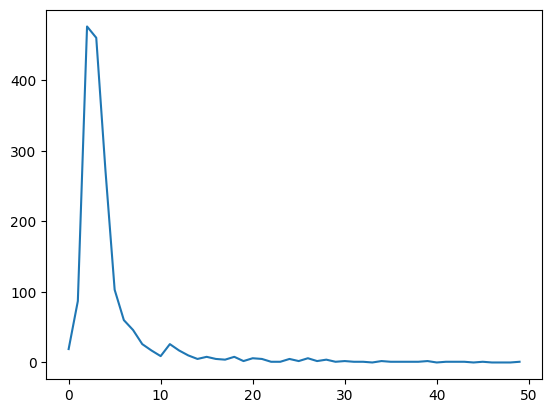

In [84]:
plt.plot(H.sum(axis=0))

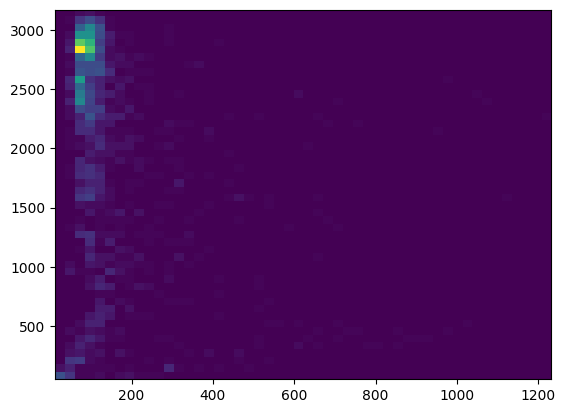

In [85]:
plt.imshow(H, interpolation="nearest", aspect='auto', origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], )

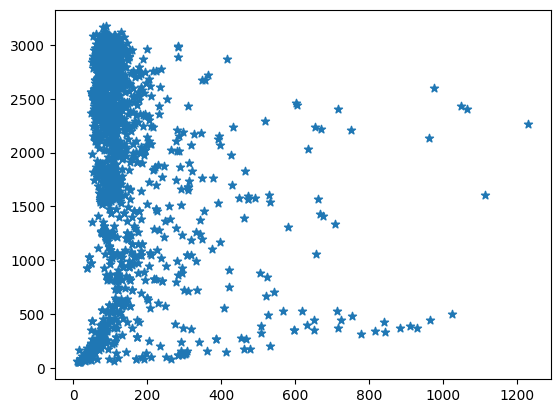

In [86]:
# normal scatter plot
plt.scatter(Y_std,Y, marker="*")

(0, 1)


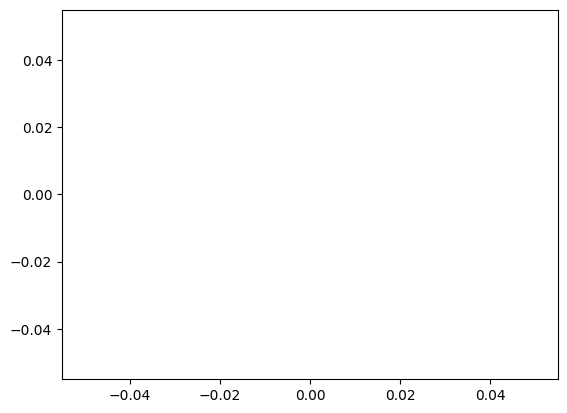

In [87]:
# low-energy points:
idx_lowenergy = np.argwhere(Y<30)
print(Y_std[idx_lowenergy].shape)
plt.scatter(Y_std[idx_lowenergy], Y[idx_lowenergy])

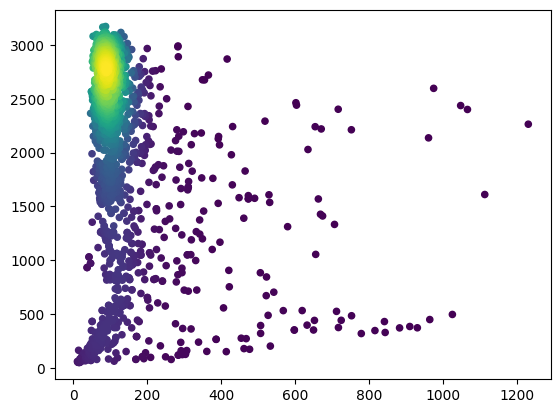

In [90]:
# Calculate the point density
xy = np.vstack([Y_std,Y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
# idx
x, y, z = Y_std[idx], Y[idx], z[idx]
plt.scatter(x, y, c=z, s=20)

### Setup the plot

In [124]:
nbins = 50
xmin, xmax = 0, 800
xbin_size = (xmax - xmin) / nbins
H, xedges, yedges = np.histogram2d(Y_std, Y, bins=(nbins, nbins), range=([[xmin,xmax],[50,3000]]))
H = H.T

In [129]:
mu, std = np.mean(Y_std[np.argwhere(Y_std<xmax)]), np.std(Y_std[np.argwhere(Y_std<xmax)])
print(mu, std)
pdf_x = np.linspace(xmin,xmax,100)
pdf_y = 1.0/np.sqrt(2*np.pi*std**2)*np.exp(-0.5*((pdf_x-mu)/std)**2)

126.69968105392422 100.34658272921708


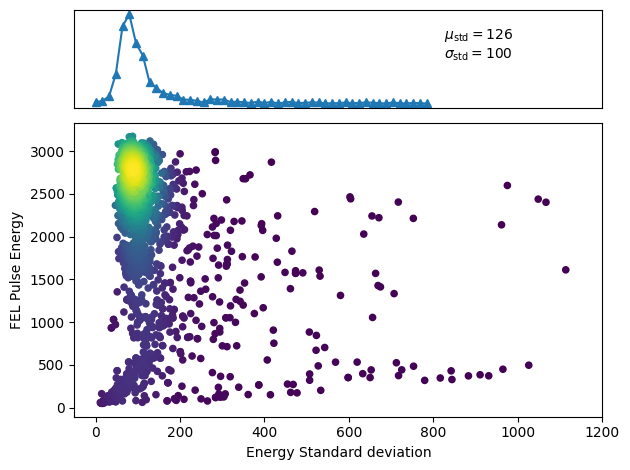

In [154]:
fig, axes = plt.subplots(2,1,gridspec_kw={"height_ratios":[1,3]})
axes[0].plot(xedges[:-1], H.sum(axis=0), ls="-", marker="^")
axes[0].text(x=0.7,y=0.7,s=r"$\mu_{\mathrm{std}} = " + f"{int(mu)}$", transform=axes[0].transAxes)
axes[0].text(x=0.7,y=0.5,s=r"$\sigma_{\mathrm{std}} = " + f"{int(std)}$", transform=axes[0].transAxes)
#axes[0].plot(pdf_x,pdf_y*len(Y_std))
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[1].scatter(x, y, c=z, s=20)
for ax in axes:
    ax.set_xlim(-50,1200)
axes[1].set_ylabel("FEL Pulse Energy")
axes[1].set_xlabel("Energy Standard deviation")

fig.tight_layout()
#fig.savefig("../plots/signal_noise.pdf", bbox_inches="tight")

(array([[432.,   1.,  nan, ...,  nan,  nan,  nan],
        [  2.,   5.,   1., ...,  nan,  nan,  nan],
        [  3.,   5.,   4., ...,   1.,  nan,   1.],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]]),
 array([  1.72547663,  20.97962071,  40.23376478,  59.48790886,
         78.74205294,  97.99619701, 117.25034109, 136.50448516,
        155.75862924, 175.01277332, 194.26691739, 213.52106147,
        232.77520554, 252.02934962, 271.2834937 , 290.53763777,
        309.79178185, 329.04592592, 348.30007   , 367.55421408,
        386.80835815, 406.06250223, 425.3166463 , 444.57079038,
        463.82493446, 483.07907853, 502.33322261, 521.58736668,
        540.84151076, 560.09565483, 579.34979891, 598.60394299,
        617.85808706, 637.11223114, 656.36637521, 675.62051929,
        694.87466337, 714.12880744, 733.38295152, 752.63709559,
        771.89123967, 791.14538375, 810

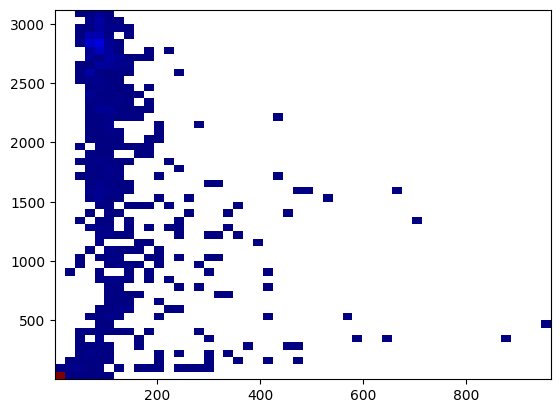

In [27]:
plt.hist2d(Y_std, Y, (50, 50), cmap=plt.cm.jet, cmin=1)